Business Context
-	
-	Customer payment behavior is essential for a bank to control its financial risk. Meanwhile, the customer’s spending pattern could highly impact their bill repayment behavior, as with higher spending, there could be a higher chance of installments or defaults, resulting in fewer payments. Analyzing payment behaviors helps in assessing the credit risk associated with each segment. Customers who only make minimum payments regularly might represent a higher risk, and identifying them early can help in risk mitigation strategies. The bank could set business strategies to reduce the likelihood of the client defaulting on the bill payment in a broader view. By understanding customers’ purchasing habits, the company can create target marketing strategies like special offers on credit cards.
-	Since we are now focusing on spending and payments areas, we extracted 11 features out of 18 features to process the customer clustering as a new data frame for further analysis.
  - Defined variables:
    - Spending patterns: ‘PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX'
    - 'Payment behaviors: 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px


In [5]:
df = pd.read_csv('/Users/huiyisang/Desktop/Customer_Data.csv')

In [6]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Check number of unknowns
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
#missing value in Minimum Payments fill in zero if payment is zero, otherwise with the mean of payments
df['MINIMUM_PAYMENTS'] = df.apply(
    lambda row: 0 if row['PAYMENTS'] == 0 else (df['PAYMENTS'].median() if pd.isnull(row['MINIMUM_PAYMENTS']) else row['MINIMUM_PAYMENTS']),
    axis=1
)

In [10]:
#missing value in credit_limit
df = df.dropna(subset=['CREDIT_LIMIT'])

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
df1 = df[['PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

Data Cleaning
-	The missing values were checked in the dataset, with 313 missing values in MINIMUM_PAYMENTS and 1 missing in CREDIT_LIMIT. We used the imputation technique to solve 313 missing based on the definition of MINIMUM_PAYMENTS. If the PAYMENTS is zero, meaning the user did not make any payment, the MINIMUM_PAYMENTS should also be zero. For the rest of the missing values, we impute the median of PAYMENTS to it. Since there is only one missing value in the CREDIT_LIMIT, we just dropped the row for that.
- Extracted 11 related variables we defined for business context as a new data frame ‘df1’ for EDA and Modeling


Exploratory Data Analysis (EDA)

In [105]:
df1.describe()

PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   8949.000000       8949.000000             8949.000000   
mean    1003.316936        592.503572              411.113579   
std     2136.727848       1659.968851              904.378205   
min        0.000000          0.000000                0.000000   
25%       39.800000          0.000000                0.000000   
50%      361.490000         38.000000               89.000000   
75%     1110.170000        577.830000              468.650000   
max    49039.570000      40761.250000            22500.000000   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8949.000000                 8949.000000   
mean              0.490405                    0.202480   
std               0.401360                    0.298345   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.300000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  \
count                       8949.000000    8949.000000   8949.000000   
mean                           0.364478      14.711476   4494.449450   
std                            0.397451      24.858552   3638.815725   
min                            0.000000       0.000000     50.000000   
25%                            0.000000       1.000000   1600.000000   
50%                            0.166667       7.000000   3000.000000   
75%                            0.750000      17.000000   6500.000000   
max                            1.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
count   8949.000000       8949.000000       8949.000000  
mean    1733.336511        841.065069          0.153732  
std     2895.168146       2334.879763          0.292511  
min        0.000000          0.000000          0.000000  
25%      383.282850        164.687639          0.000000  
50%      857.062706        299.935043          0.000000  
75%     1901.279320        819.267218          0.142857  
max    50721.483360      76406.207520          1.000000

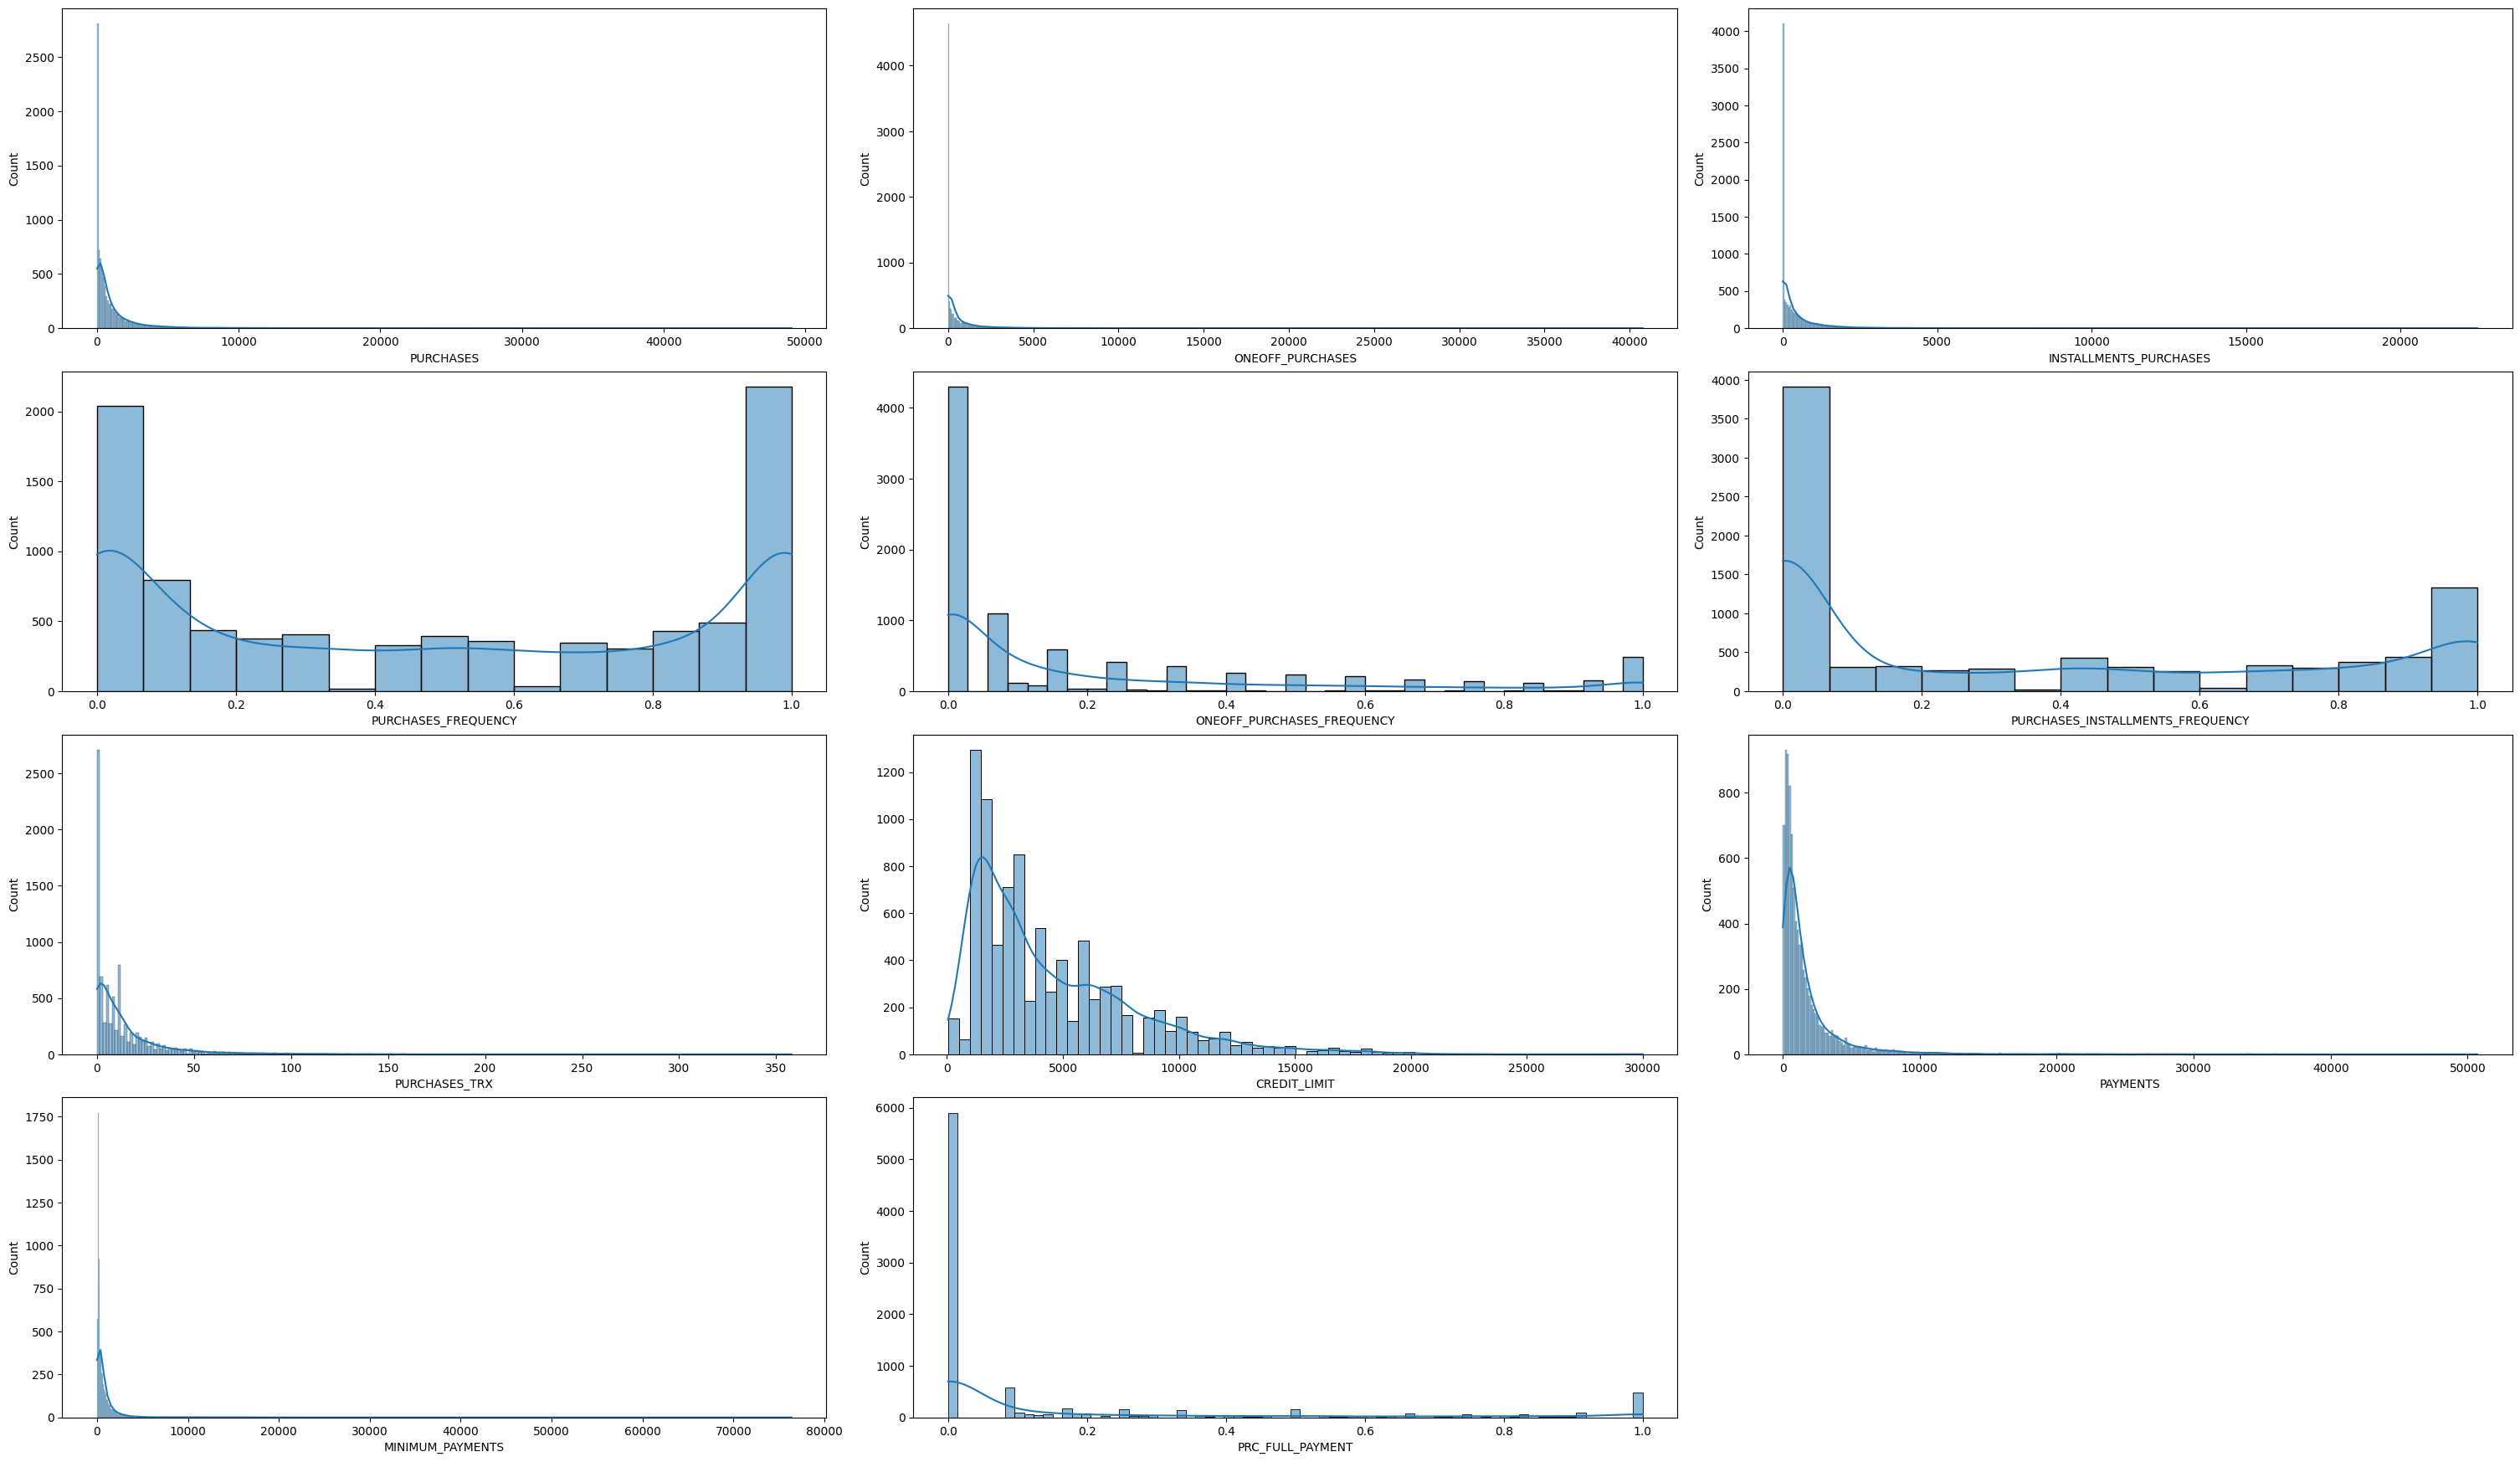

In [13]:
# creating distribution plot for analysis
fig = plt.figure(figsize=(30, 25), constrained_layout=True)
for i in range(len(df1.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df1[df1.columns[i]], kde=True)

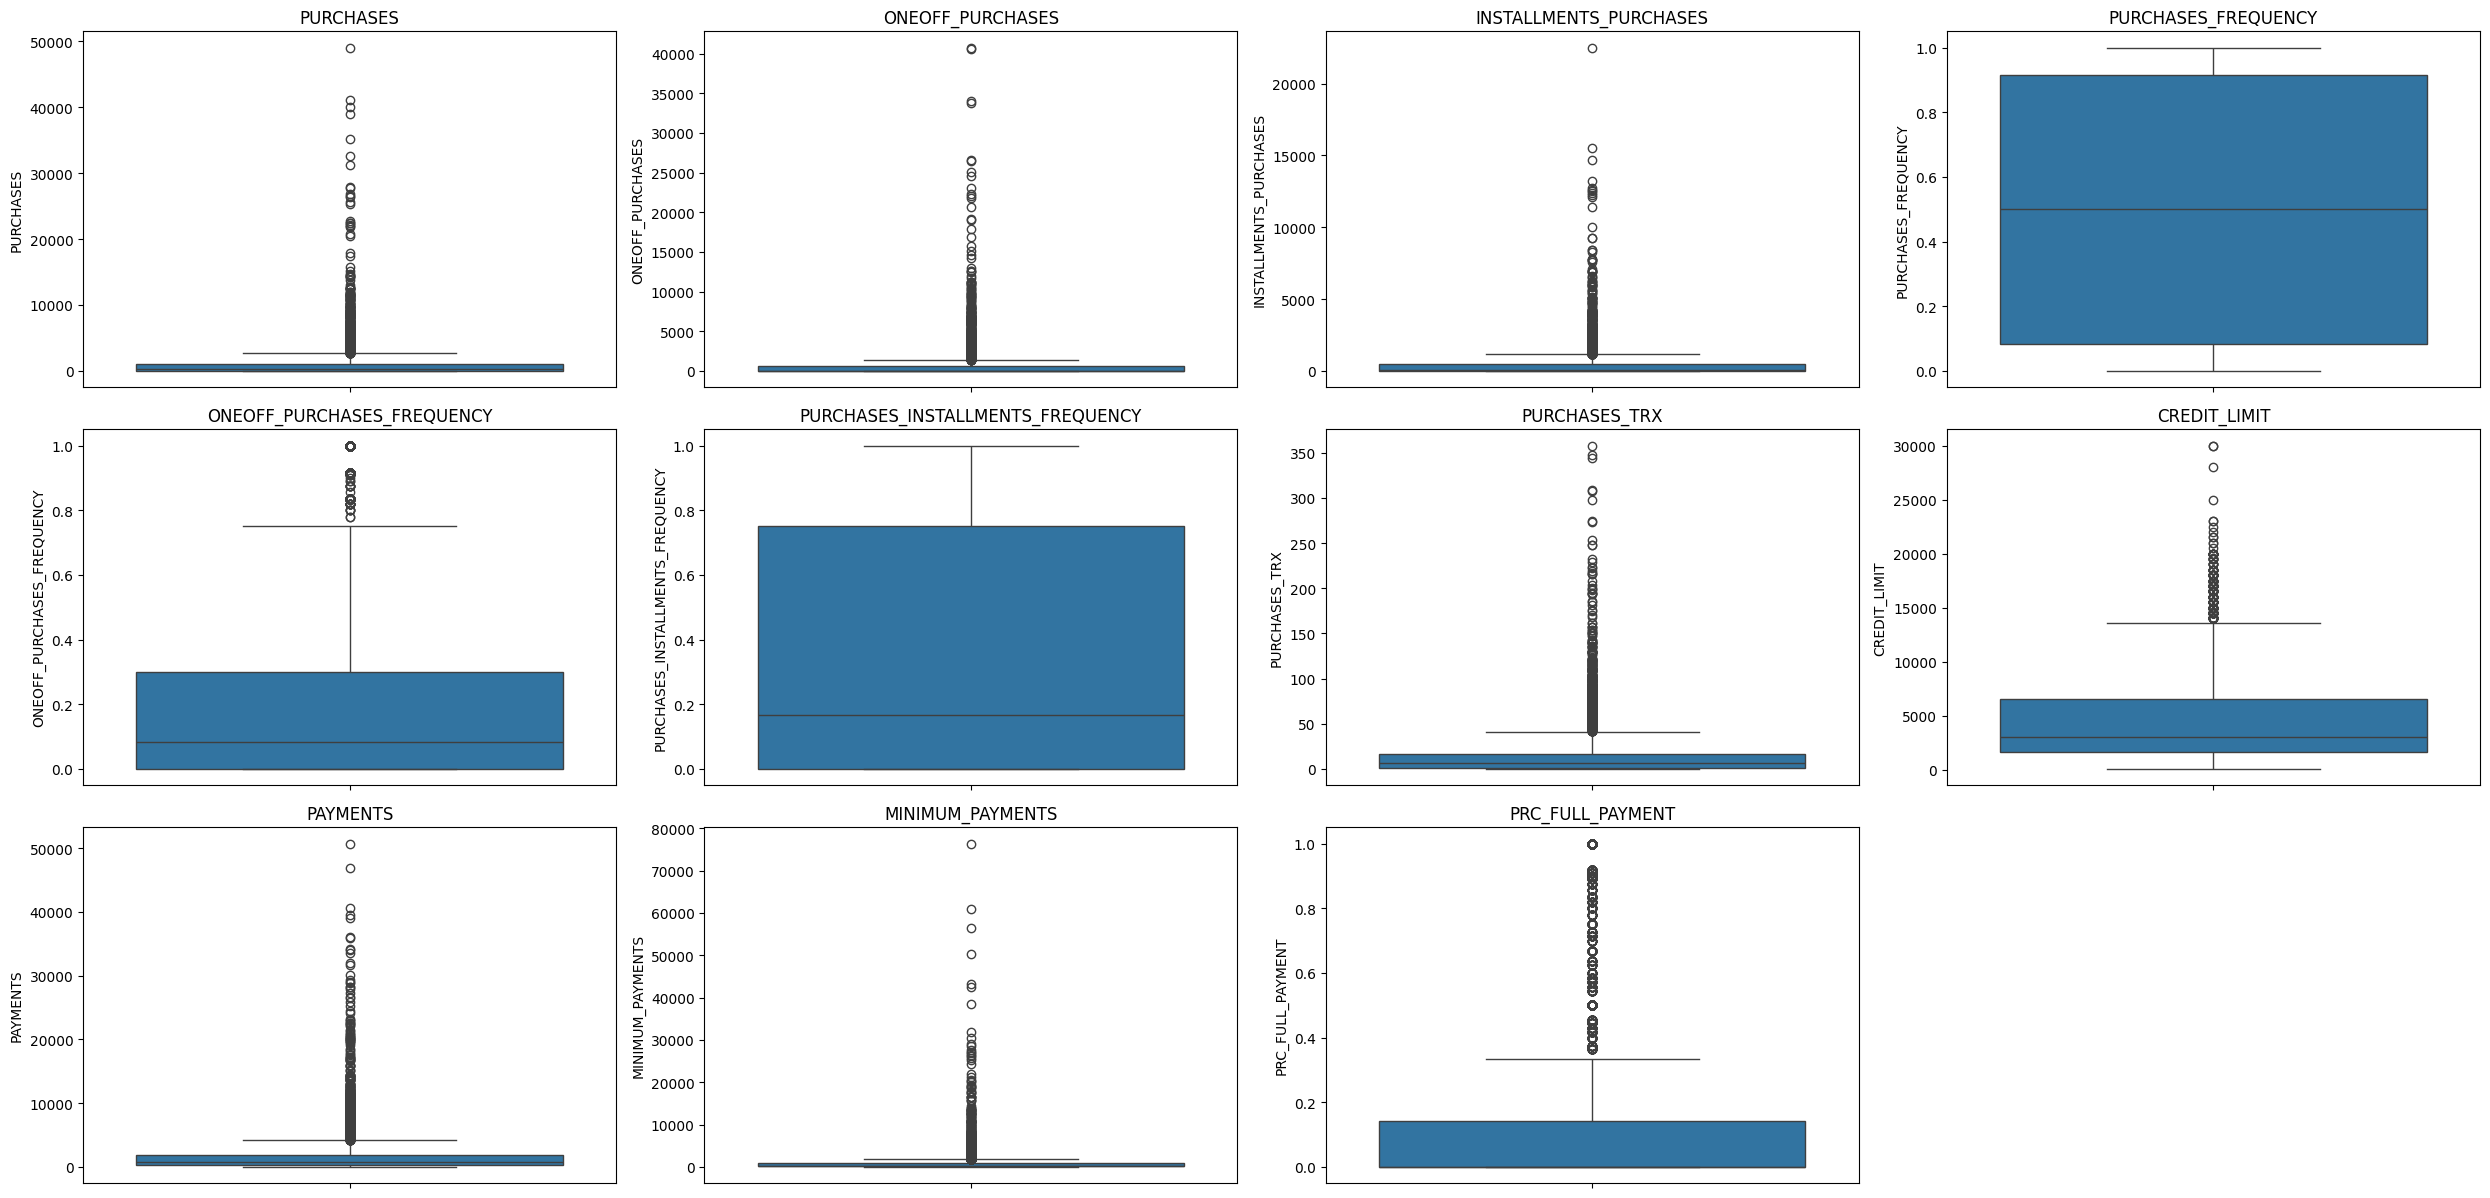

In [14]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(df1.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df1[df1.columns[i]])
    plt.title(df1.columns[i])
    
plt.tight_layout()

In [104]:
#handling outlier with quantile
# Cap/floor outliers using quantiles
capped_data = df1.copy()
upper_bound = df1.quantile(0.9)
capped_data = capped_data.clip(upper=upper_bound, axis=1)

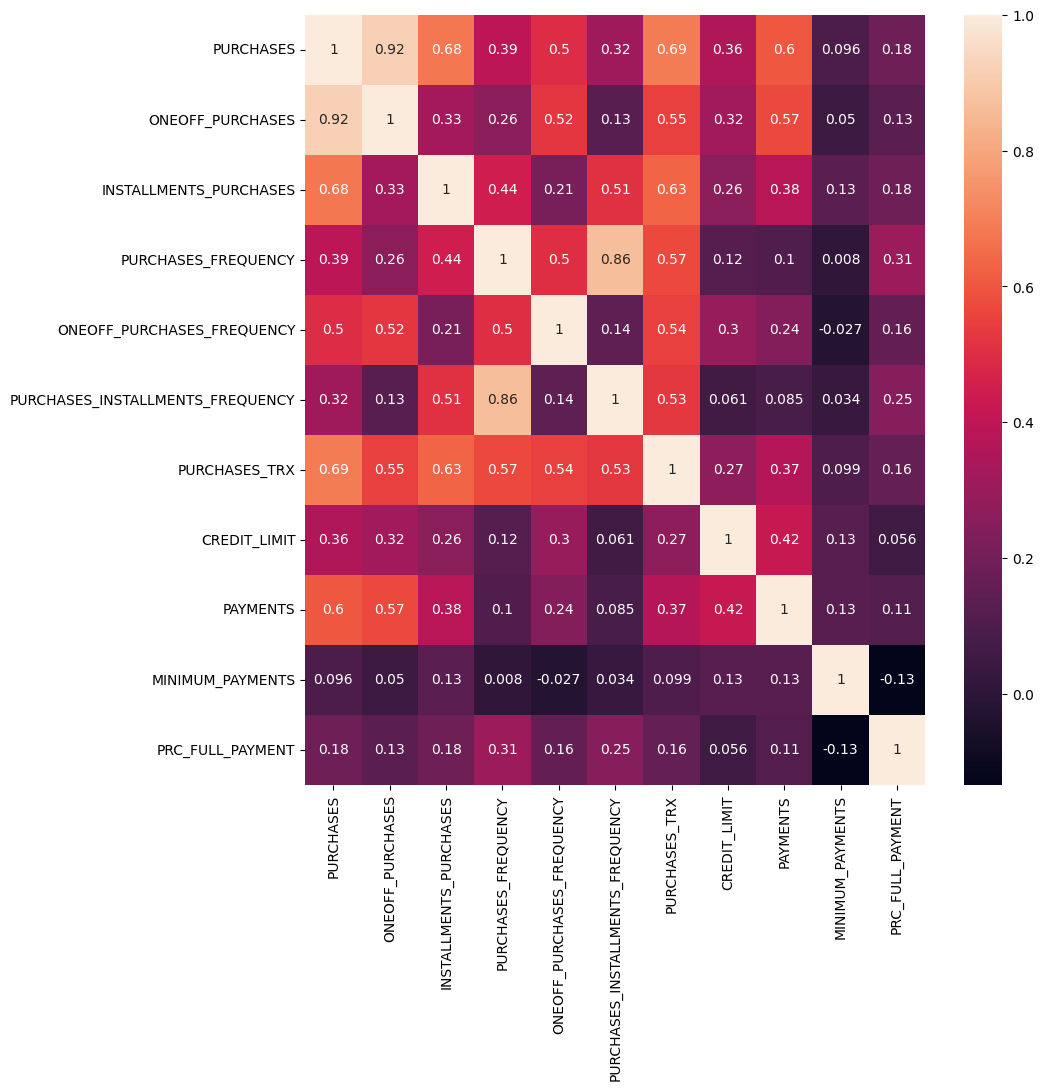

In [15]:
# calculates the correlations
correlation = df1.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(10, 10)
sns.heatmap(correlation, annot=True);

# displays the plot
plt.show()

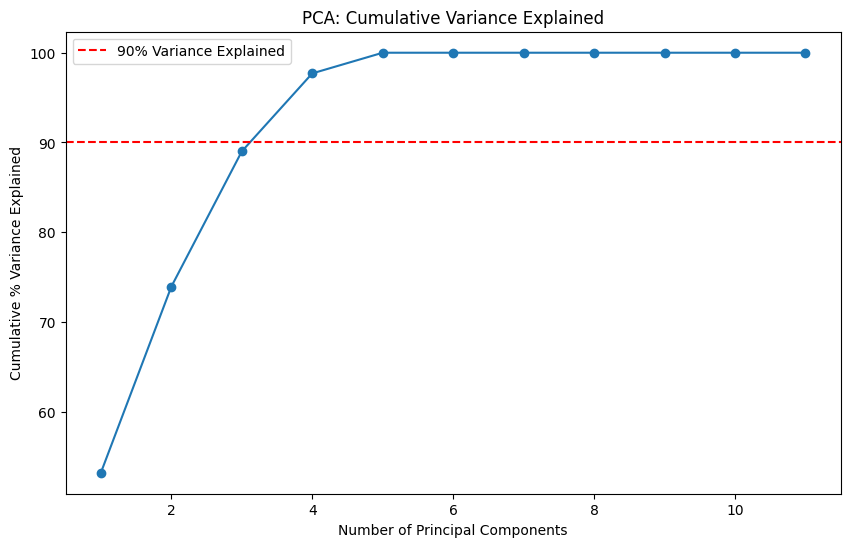

In [18]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame called final_data
pca = PCA(n_components=len(df1.columns))
pca.fit(df1)

# Calculate the cumulative variance explained by each component
variance_explained = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative % Variance Explained')
plt.title('PCA: Cumulative Variance Explained')
plt.axhline(y=90, color='r', linestyle='--', label='90% Variance Explained')
plt.legend()
plt.show()


In [19]:
# Use PCA to keep enough components to explain at least 90% of the variance
pca = PCA(n_components=0.9)  # Retain components explaining 90% variance
pca_data = pca.fit_transform(df1)

print(f"Number of components explaining 90% variance: {pca.n_components_}")

Number of components explaining 90% variance: 4


In [64]:
# Step 1: Feature Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df1)

# Step 2: Dimensionality Reduction using PCA
pca = PCA(n_components = 4)
data_pca = pca.fit_transform(data_scaled)

In [65]:
# Results after scaling and PCA
scaled_columns = pd.DataFrame(data_scaled)
pca_columns = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

In [66]:
pca_columns

PC1       PC2       PC3       PC4
0    -0.492363 -0.110175 -0.034649 -0.089333
1    -0.610514 -0.012425  0.199910  0.129689
2     0.281026  0.859208 -0.389648 -0.168557
3    -0.575703  0.021734 -0.045598  0.105281
4    -0.583542 -0.005773 -0.038859 -0.076064
...        ...       ...       ...       ...
8944  0.667378 -0.303275  0.290554 -0.156604
8945  0.567891 -0.403338 -0.188871 -0.160090
8946  0.394499 -0.287082  0.082687 -0.150457
8947 -0.612635 -0.035296  0.232752 -0.072135
8948 -0.033692  0.532558 -0.260023 -0.240203

[8949 rows x 4 columns]

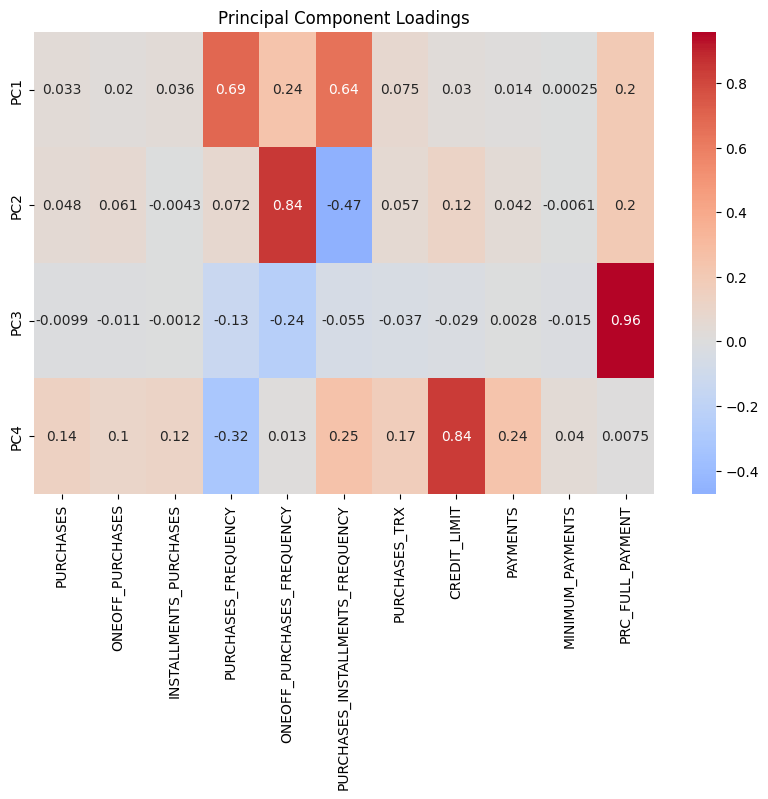

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

loadings = pd.DataFrame(pca.components_, columns=df1.columns, index=[f'PC{i+1}' for i in range(4)])

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Principal Component Loadings")
plt.show()

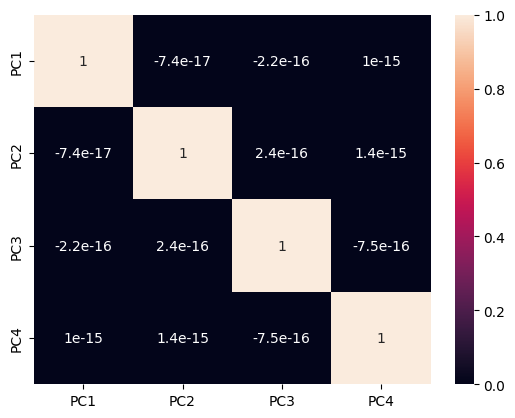

In [67]:
#Heatmap check
sns.heatmap(pca_columns.corr(), annot=True);

Modeling
- K-MEANS
- DBSCAN
- K-Meoids

K-means

In [68]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [69]:
inertia = []
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(pca_columns)
    inertia.append(kmeans.inertia_)
    silh.append(silhouette_score(pca_columns, kmeans.labels_))

In [70]:
inertia

[2136.144959849082,
 1566.1174508655,
 1374.1683155249716,
 1076.112104515806,
 901.5946722073418,
 761.057730955152,
 635.4573486533855,
 562.0225672310326]

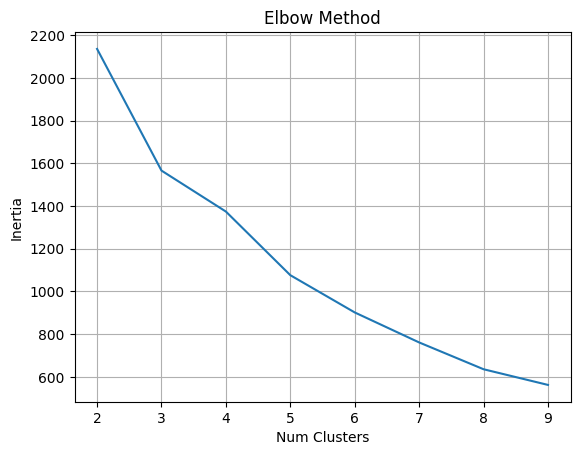

In [71]:
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

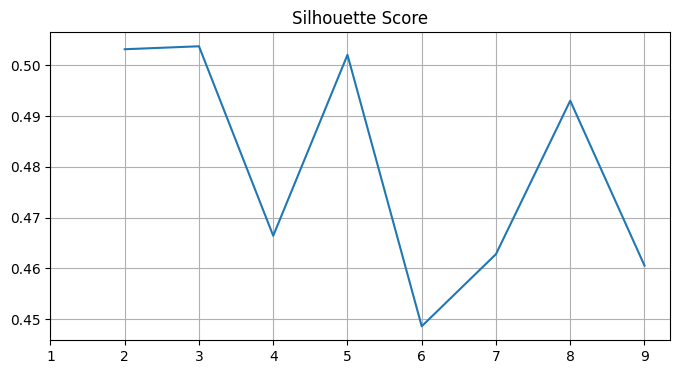

In [72]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [73]:
# Choosing cluster 
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_columns)
kmeans_labels = kmeans.labels_

DBSCAN

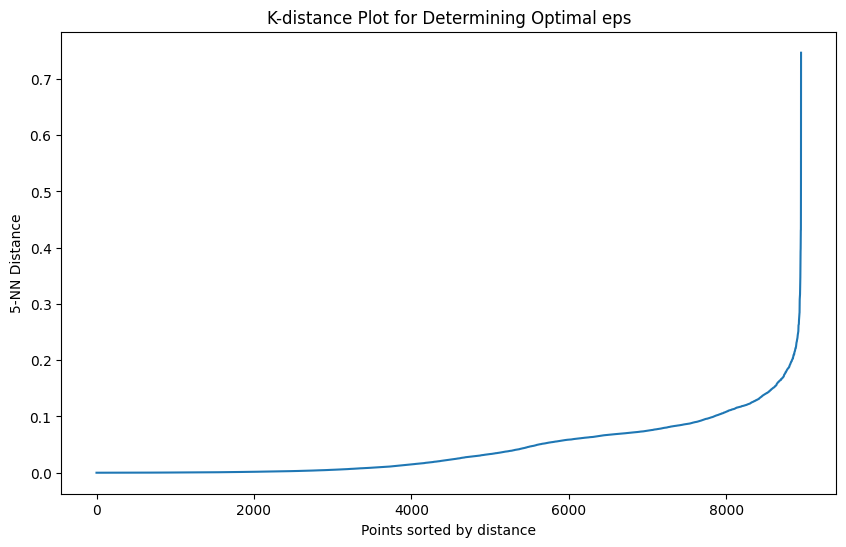

In [74]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Set the number of neighbors to min_samples
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(pca_columns.iloc[:, :4]) 
distances, indices = neighbors_fit.kneighbors(pca_columns.iloc[:, :4])

# Sort the distances and plot them
distances = np.sort(distances[:, min_samples - 1])  # Only take the distance to the k-th neighbor
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN Distance")
plt.title("K-distance Plot for Determining Optimal eps")
plt.show()

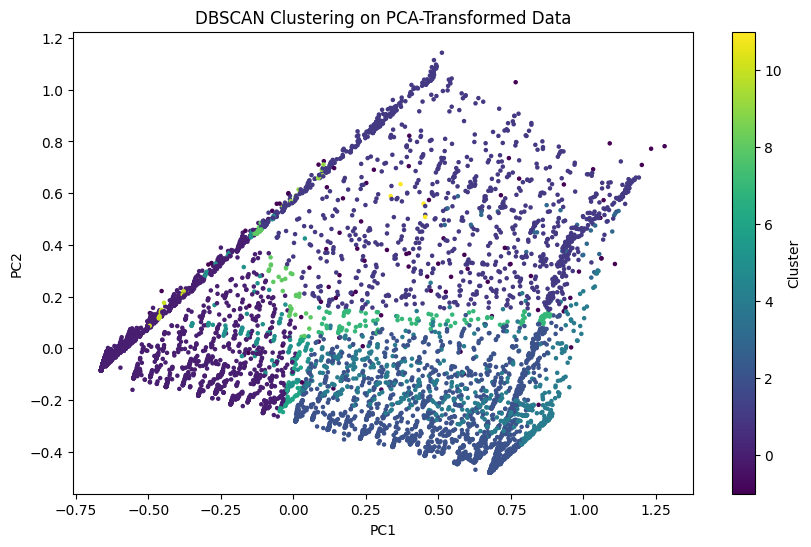

Number of clusters found: 13
Cluster labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}


In [94]:
# Step 1: Initialize DBSCAN model
# Note: eps and min_samples may need adjustment for optimal results

eps = 0.2  # Replace with the value you found from the k-distance plot
min_samples = 6
dbscan = DBSCAN(eps=eps)  # you might want to tune these parameters

# Step 2: Fit the model
dbscan_model = dbscan.fit(pca_columns)

# Step 3: Add the cluster labels to the PCA DataFrame
dbscan_labels = dbscan_model.labels_

# Optional: Visualize the clusters in the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_columns['PC1'], pca_columns['PC2'], c=dbscan_labels, cmap='viridis', s=5)
plt.colorbar(label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering on PCA-Transformed Data')
plt.show()

# Check the number of unique clusters
unique_clusters = set(dbscan_labels)
print(f"Number of clusters found: {len(unique_clusters)}")
print(f"Cluster labels: {unique_clusters}")

K-Medoids

In [76]:
inertia = []
silh = []

for i in range(2,10):
    kmedoids = KMedoids(n_clusters = i) 
    kmedoids.fit(pca_columns)
    inertia.append(kmedoids.inertia_)
    silh.append(silhouette_score(pca_columns, kmedoids.labels_))

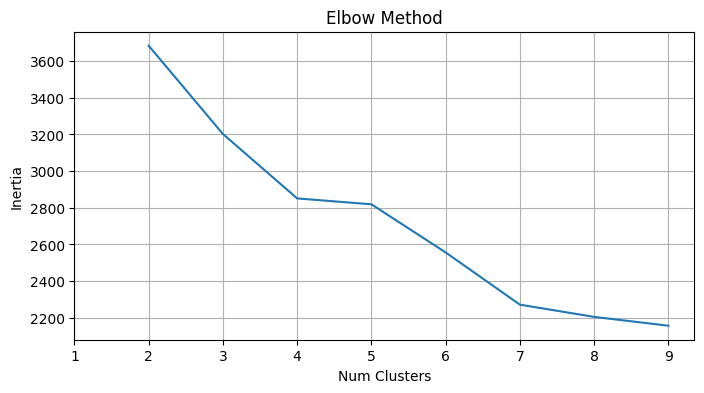

In [106]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,10))
plt.grid()
plt.show()

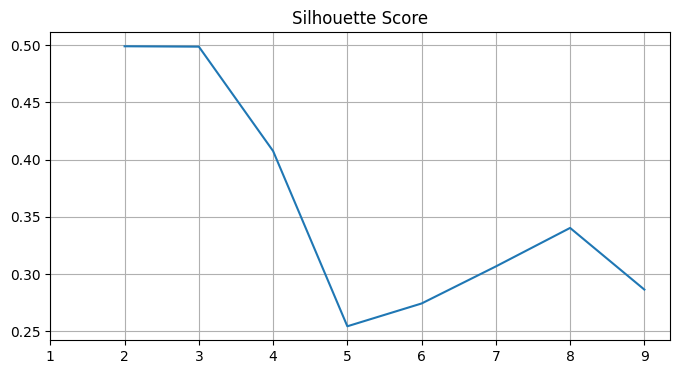

In [78]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [79]:
# Final decision on numbers of cluster chosen: 3

kmedoids = KMedoids(n_clusters = 3)
kmedoids.fit(pca_columns)
kmedoids_labels = kmedoids.labels_

Evaluation

In [95]:
# K-Means silhouette score
kmeans_silhouette = silhouette_score(pca_columns.iloc[:, :4], kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

# DBSCAN silhouette score
dbscan_silhouette = silhouette_score(pca_columns.iloc[:, :4], dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# For K-Medoids
kmedoids_silhouette = silhouette_score(pca_columns.iloc[:, :4], kmedoids_labels)
print("K-Medoids Silhouette Score:", kmedoids_silhouette)

K-Means Silhouette Score: 0.5114396761649949
DBSCAN Silhouette Score: 0.20814002225312914
K-Medoids Silhouette Score: 0.4987438376261339


In [96]:
# Count of clusters and noise in DBSCAN
unique_clusters_dbscan = pd.Series(dbscan_labels).value_counts()
print("DBSCAN Cluster Distribution:\n", unique_clusters_dbscan)

# Count of clusters in K-Means
unique_clusters_kmeans = pd.Series(kmeans_labels).value_counts()
print("K-Means Cluster Distribution:\n", unique_clusters_kmeans)

# K-Medoids cluster distribution
unique_clusters_kmedoids = pd.Series(kmedoids_labels).value_counts()
print("K-Medoids Cluster Distribution:\n", unique_clusters_kmedoids)

DBSCAN Cluster Distribution:
  0     4408
 2     2121
 1     1213
 4      668
 5      116
 7      104
 6       90
-1       88
 8       59
 10      33
 3       32
 9       13
 11       4
Name: count, dtype: int64
K-Means Cluster Distribution:
 1    4596
0    2230
2    1252
3     871
Name: count, dtype: int64
K-Medoids Cluster Distribution:
 2    4571
0    2895
1    1483
Name: count, dtype: int64


In [97]:
print("K-Means Inertia:", kmeans.inertia_)

print("K-Medoids Inertia:", kmedoids.inertia_)

K-Means Inertia: 1252.1636298736255
K-Medoids Inertia: 3202.4493202769972


In [98]:
from sklearn.metrics import davies_bouldin_score

# K-Means DBI
kmeans_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], kmeans_labels)
print("K-Means Davies-Bouldin Index:", kmeans_dbi)

# DBSCAN DBI
dbscan_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], dbscan_labels)
print("DBSCAN Davies-Bouldin Index:", dbscan_dbi)

# K-Medoids DBI
kmedoids_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], kmedoids_labels)
print("K-Medoids Davies-Bouldin Index:", kmedoids_dbi)


K-Means Davies-Bouldin Index: 0.9488710771159842
DBSCAN Davies-Bouldin Index: 1.3478048349220584
K-Medoids Davies-Bouldin Index: 1.0914792259659372


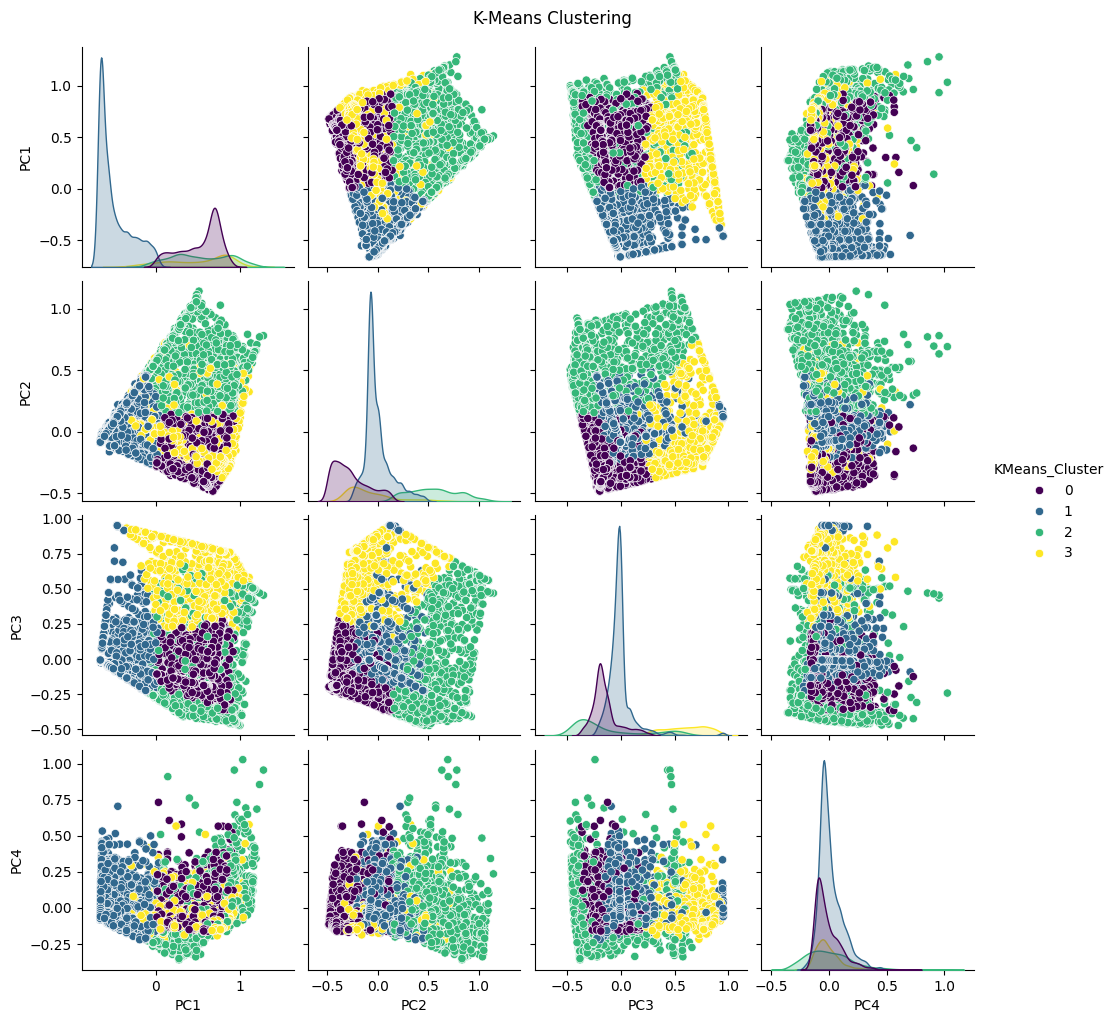

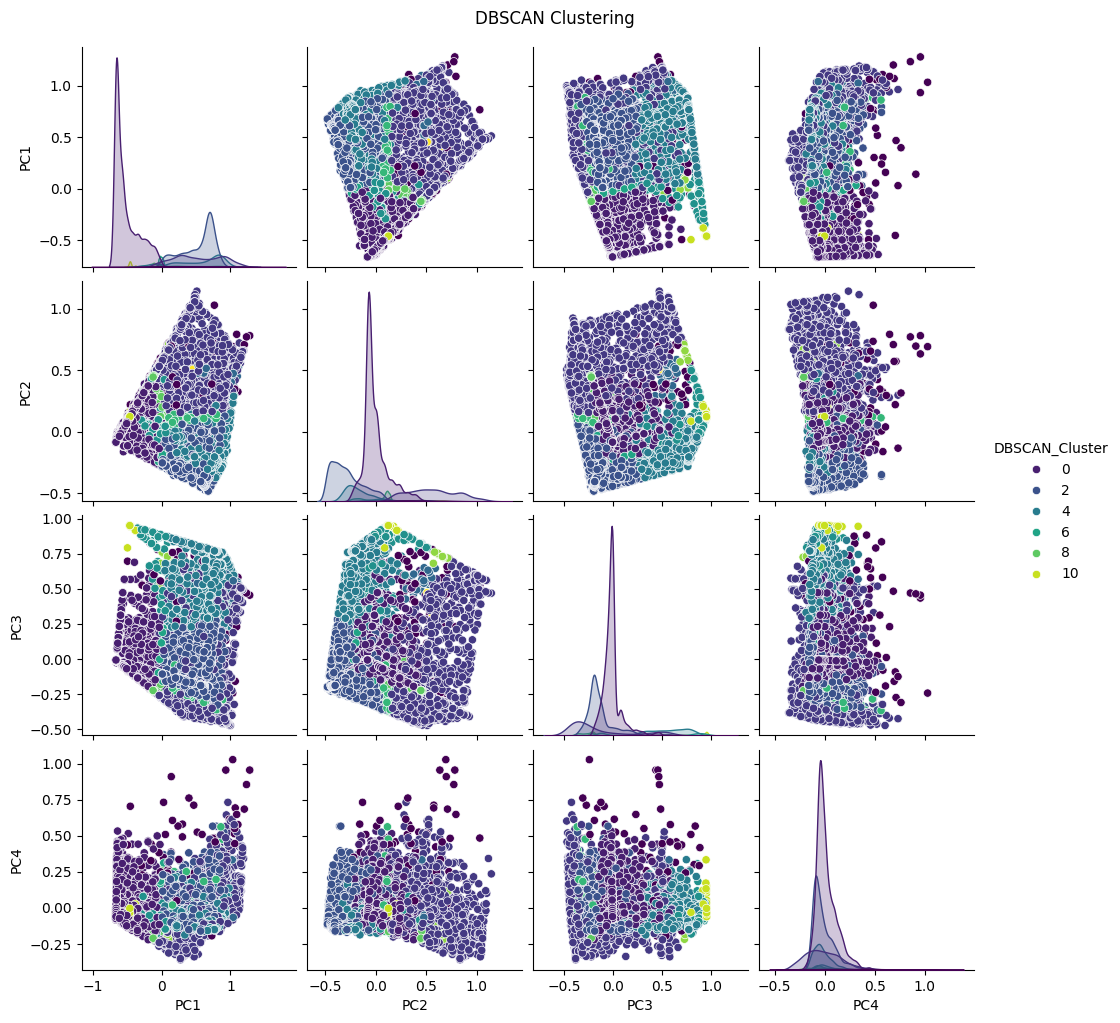

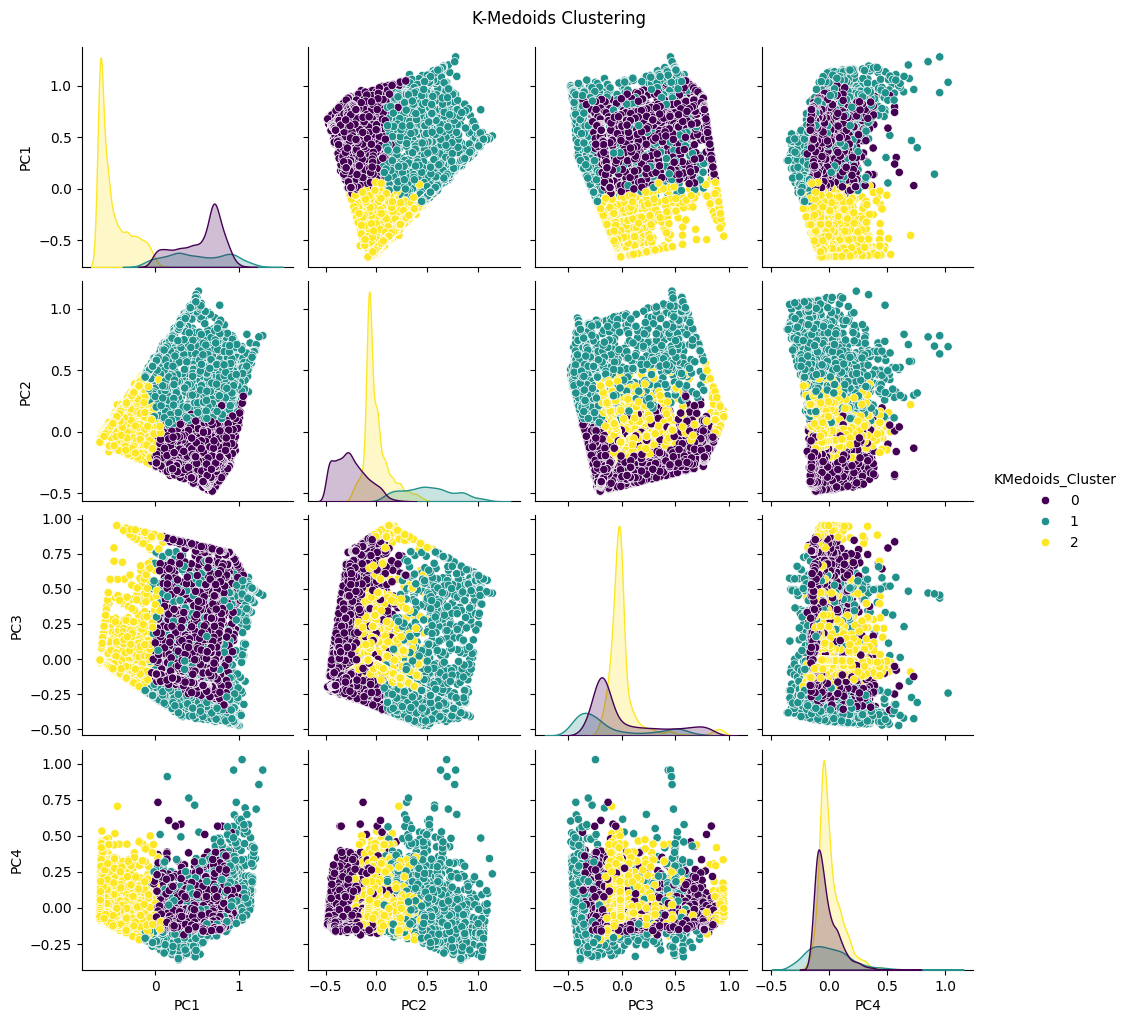

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding labels to the PCA DataFrame for visualization
pca_columns['KMeans_Cluster'] = kmeans_labels
pca_columns['DBSCAN_Cluster'] = dbscan_labels
pca_columns['KMedoids_Cluster'] = kmedoids_labels

# Pair plots for K-Means
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='KMeans_Cluster', palette='viridis')
plt.suptitle("K-Means Clustering", y=1.02)
plt.show()

# Pair plots for DBSCAN
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='DBSCAN_Cluster', palette='viridis')
plt.suptitle("DBSCAN Clustering", y=1.02)
plt.show()

# Pair plots for K-Medoids
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='KMedoids_Cluster', palette='viridis')
plt.suptitle("K-Medoids Clustering", y=1.02)
plt.show()


K-Means is the best

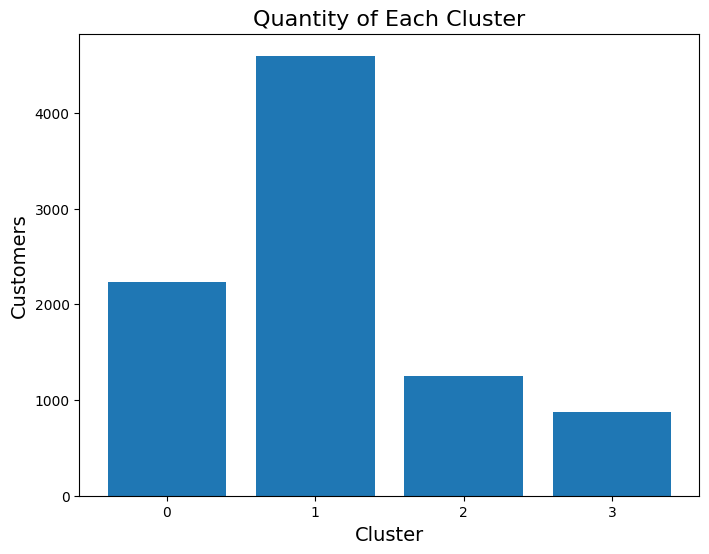

Cluster 0: 2230
Cluster 1: 4596
Cluster 2: 1252
Cluster 3: 871


In [85]:
labels, counts = np.unique(kmeans_labels, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

In [86]:
loadings = pca.components_

# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(loadings, columns=df1.columns, index=[f'PC{i+1}' for i in range(len(loadings))])
print(loadings_df)

     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
PC1   0.032957          0.019989                0.035631             0.690963   
PC2   0.048367          0.060525               -0.004260             0.071826   
PC3  -0.009887         -0.011230               -0.001194            -0.134796   
PC4   0.139007          0.102995                0.116397            -0.316726   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
PC1                    0.241854                          0.644168   
PC2                    0.841328                         -0.471759   
PC3                   -0.239571                         -0.055049   
PC4                    0.013117                          0.251954   

     PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
PC1       0.075295      0.029981  0.014256          0.000247          0.198991  
PC2       0.056799      0.115918  0.041934         -0.006128          0.199929  
PC3  

In [91]:
final_data = pca_columns.copy()
final_data['Label'] = kmeans_labels

final_data.head()

PC1       PC2       PC3       PC4  KMeans_Cluster  DBSCAN_Cluster  \
0 -0.492363 -0.110175 -0.034649 -0.089333               1               0   
1 -0.610514 -0.012425  0.199910  0.129689               1               0   
2  0.281026  0.859208 -0.389648 -0.168557               2               0   
3 -0.575703  0.021734 -0.045598  0.105281               1               0   
4 -0.583542 -0.005773 -0.038859 -0.076064               1               0   

   KMedoids_Cluster  Label  
0                 2      1  
1                 2      1  
2                 1      2  
3                 2      1  
4                 2      1

In [88]:
# Calculate mean values of each feature by cluster
cluster_summary = final_data.groupby('Label').mean()

cluster_summary_df = cluster_summary.reset_index()
print(cluster_summary_df.reset_index())

   index  Label    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0      0      0  1182.747919        375.148771              808.182825   
1      1      1   287.456614        234.585359               53.016175   
2      2      2  3256.163642       2489.424465              766.739177   
3      3      3  1082.994168        310.928783              772.890850   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.876676                    0.131187   
1             0.138713                    0.082876   
2             0.901793                    0.832958   
3             0.765877                    0.109862   

   PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                          0.824845      23.119731   4108.776102  1557.377849   
1                          0.055466       2.623151   4123.630232  1473.444766   
2                          0.457099      42.518371   6804.870026  3307.134519   
3                          0.68323

In [89]:
for i in range(4):
    print('Cluster:', i)
    display(final_data[final_data['Label'] == i].describe())
    print('\n')

Cluster: 0


PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   2230.000000       2230.000000             2230.000000   
mean    1182.747919        375.148771              808.182825   
std     1465.199258        747.279391             1068.266348   
min       12.000000          0.000000               12.000000   
25%      348.612500          0.000000              270.390000   
50%      675.925000          0.000000              499.295000   
75%     1498.795000        436.322500              984.295000   
max    22500.000000       9805.730000            22500.000000   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          2230.000000                 2230.000000   
mean              0.876676                    0.131187   
std               0.155308                    0.175372   
min               0.500000                    0.000000   
25%               0.750000                    0.000000   
50%               1.000000                    0.000000   
75%               1.000000                    0.250000   
max               1.000000                    0.666667   

       PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  \
count                       2230.000000    2230.000000   2230.000000   
mean                           0.824845      23.119731   4108.776102   
std                            0.187025      23.643010   3418.589772   
min                            0.333333       0.000000    450.000000   
25%                            0.666667      11.000000   1500.000000   
50%                            0.904546      15.000000   3000.000000   
75%                            1.000000      27.000000   6000.000000   
max                            1.000000     347.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   Label  
count   2230.000000       2230.000000       2230.000000  2230.0  
mean    1557.377849       1174.529961          0.059861     0.0  
std     2335.682421       3349.008966          0.114662     0.0  
min        0.000000          0.000000          0.000000     0.0  
25%      399.524737        171.444479          0.000000     0.0  
50%      879.873988        380.548620          0.000000     0.0  
75%     1778.534765       1026.991322          0.083333     0.0  
max    40627.595240      76406.207520          0.500000     0.0



Cluster: 1


PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   4596.000000       4596.000000             4596.000000   
mean     287.456614        234.585359               53.016175   
std      764.138165        718.906571              246.394106   
min        0.000000          0.000000                0.000000   
25%        0.000000          0.000000                0.000000   
50%       47.740000          0.000000                0.000000   
75%      305.647500        209.032500                0.000000   
max    22101.780000      22101.780000            12541.000000   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4596.000000                 4596.000000   
mean              0.138713                    0.082876   
std               0.167186                    0.127600   
min               0.000000                    0.000000   
25%               0.000000                    0.000000   
50%               0.083333                    0.000000   
75%               0.250000                    0.100000   
max               0.666667                    0.583333   

       PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  \
count                       4596.000000    4596.000000   4596.000000   
mean                           0.055466       2.623151   4123.630232   
std                            0.115127       4.956026   3327.212243   
min                            0.000000       0.000000     50.000000   
25%                            0.000000       0.000000   1500.000000   
50%                            0.000000       1.000000   3000.000000   
75%                            0.000000       4.000000   6000.000000   
max                            0.454545     186.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   Label  
count   4596.000000       4596.000000       4596.000000  4596.0  
mean    1473.444766        834.659348          0.045374     1.0  
std     2617.301005       2134.695239          0.128737     0.0  
min        0.000000          0.000000          0.000000     1.0  
25%      316.507437        173.435791          0.000000     1.0  
50%      676.820723        380.123115          0.000000     1.0  
75%     1538.641177        854.016630          0.000000     1.0  
max    50721.483360      61031.618600          1.000000     1.0



Cluster: 2


PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   1252.000000       1252.000000             1252.000000   
mean    3256.163642       2489.424465              766.739177   
std     4281.539520       3492.712972             1379.613996   
min        8.400000          8.400000                0.000000   
25%     1070.010000        818.065000                0.000000   
50%     2101.010000       1523.370000              303.255000   
75%     3853.792500       2789.070000              935.495000   
max    49039.570000      40761.250000            15497.190000   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          1252.000000                 1252.000000   
mean              0.901793                    0.832958   
std               0.136674                    0.172703   
min               0.500000                    0.333333   
25%               0.833333                    0.666667   
50%               1.000000                    0.916667   
75%               1.000000                    1.000000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  \
count                       1252.000000    1252.000000   1252.000000   
mean                           0.457099      42.518371   6804.870026   
std                            0.384787      40.317808   4391.109739   
min                            0.000000       5.000000    300.000000   
25%                            0.000000      17.000000   3500.000000   
50%                            0.416667      29.500000   6000.000000   
75%                            0.833333      52.000000   9000.000000   
max                            1.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   Label  
count   1252.000000       1252.000000       1252.000000  1252.0  
mean    3307.134519        727.485539          0.257996     2.0  
std     4494.324834       1305.374551          0.357059     0.0  
min        0.000000          0.000000          0.000000     2.0  
25%     1027.038005        182.558084          0.000000     2.0  
50%     1924.419142        284.732164          0.000000     2.0  
75%     3798.140189        849.139220          0.465909     2.0  
max    46930.598240      21235.065300          1.000000     2.0



Cluster: 3


PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count    871.000000        871.000000              871.000000   
mean    1082.994168        310.928783              772.890850   
std     1383.429118        763.660439             1017.955545   
min       27.420000          0.000000                0.000000   
25%      312.675000          0.000000              256.305000   
50%      608.800000          0.000000              469.000000   
75%     1287.885000        185.525000              957.330000   
max    14604.870000       6965.060000            12375.000000   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           871.000000                  871.000000   
mean              0.765877                    0.109862   
std               0.255244                    0.196384   
min               0.083333                    0.000000   
25%               0.583333                    0.000000   
50%               0.833333                    0.000000   
75%               1.000000                    0.154762   
max               1.000000                    0.916667   

       PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT  \
count                        871.000000     871.000000    871.000000   
mean                           0.683238      17.000000   4117.515047   
std                            0.300716      19.626044   3333.915006   
min                            0.000000       1.000000    300.000000   
25%                            0.500000       7.000000   1500.000000   
50%                            0.750000      12.000000   3000.000000   
75%                            1.000000      19.000000   5500.000000   
max                            1.000000     232.000000  21500.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  Label  
count    871.000000        871.000000        871.000000  871.0  
mean    1292.986535        184.366508          0.815969    3.0  
std     1677.017478        284.916086          0.190147    0.0  
min       34.401591         18.092319          0.363636    3.0  
25%      381.355436        128.385052          0.666667    3.0  
50%      748.302786        155.950733          0.857143    3.0  
75%     1518.116503        175.623768          1.000000    3.0  
max    15246.115940       4553.156050          1.000000    3.0

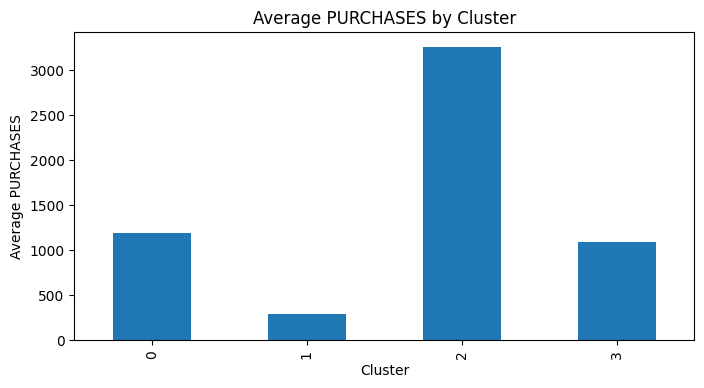

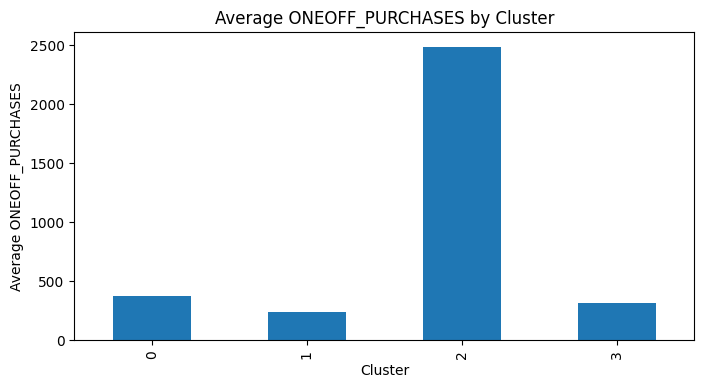

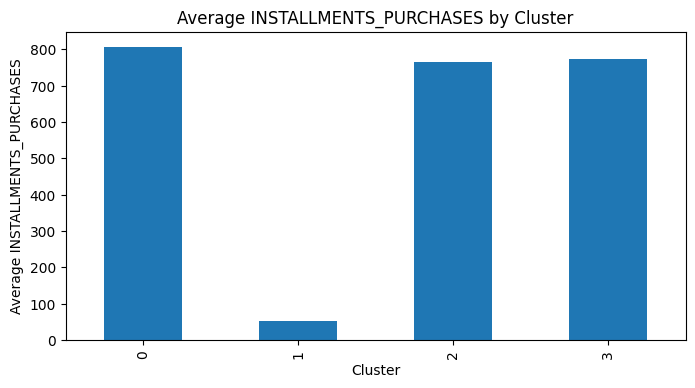

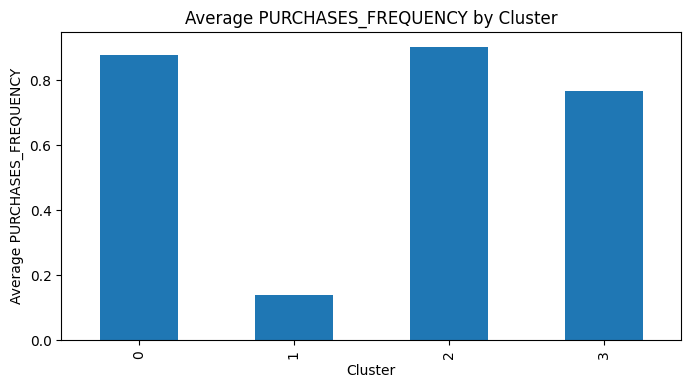

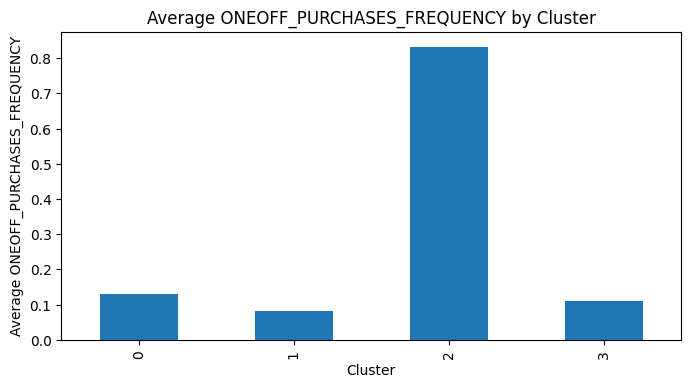

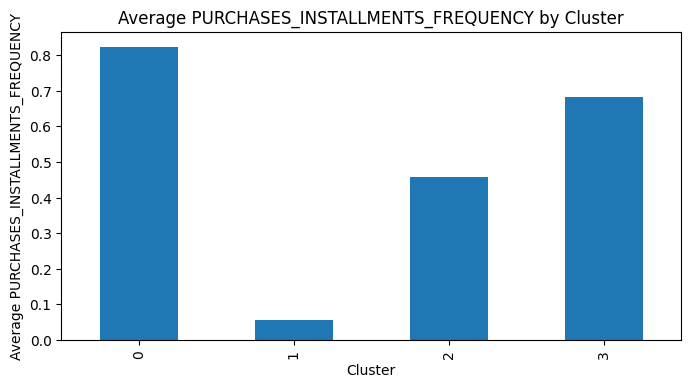

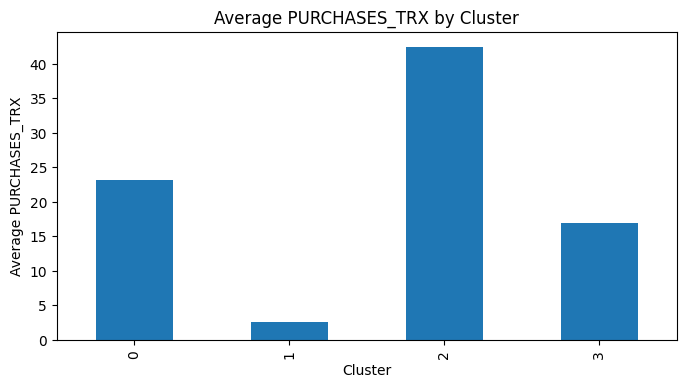

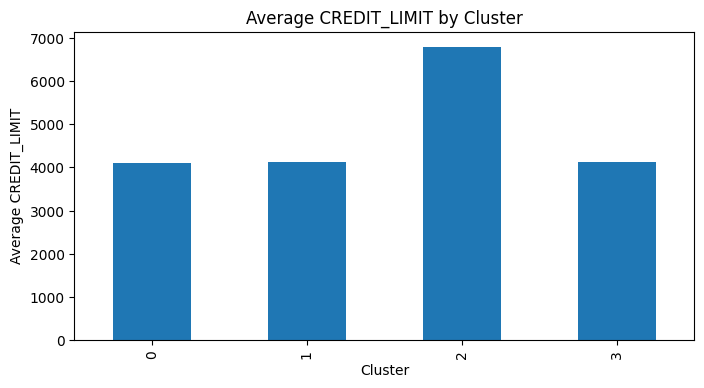

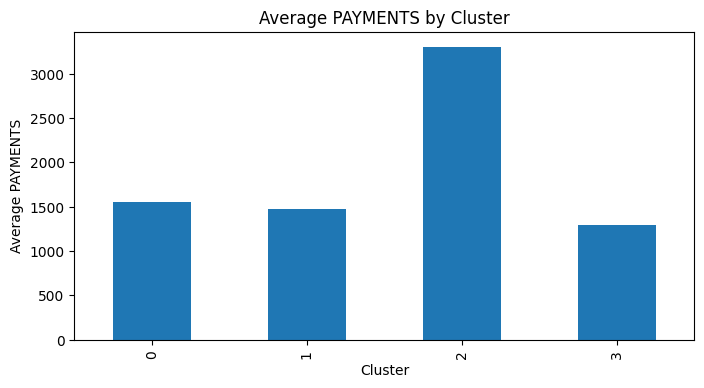

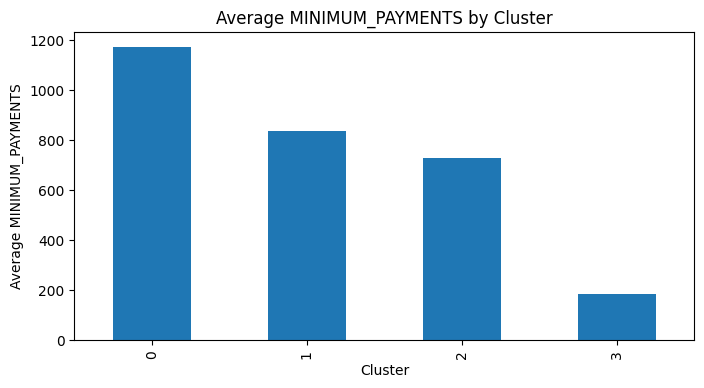

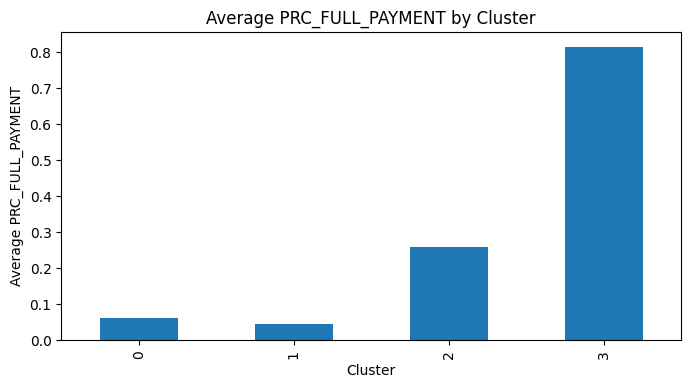

In [90]:
import matplotlib.pyplot as plt

# Plotting the mean of selected features by cluster
features_to_plot = ['PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    cluster_summary[feature].plot(kind='bar')
    plt.title(f"Average {feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(f"Average {feature}")
    plt.show()
